### 演習
- iTossにあるsoya.jpegに対して，ルックアップテーブルを作成し，以下の画像変換を行いなさい
    - A. グレースケール画像に対して
        1. 明度調整（$a = 1.4$, $b = 50$）

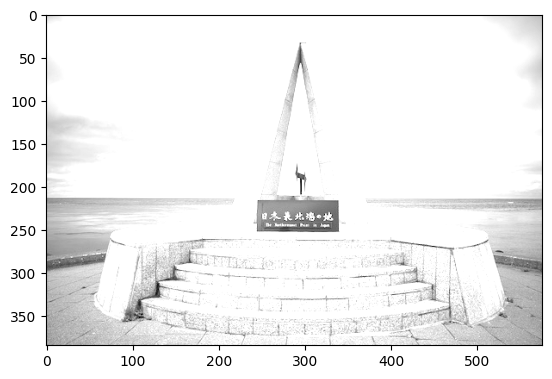

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('soya.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
a = 1.4
b = 50
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value * a + b 
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

        2. コントラスト低減（画素値を0から20にする）

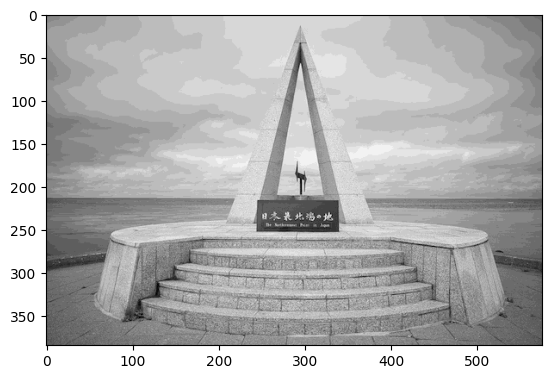

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('soya.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
a = 0
b = 20
before_pixel_value = np.arange(256)
after_pixel_value = a + before_pixel_value / 255 * (b - a)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

        3. ソラリゼーション

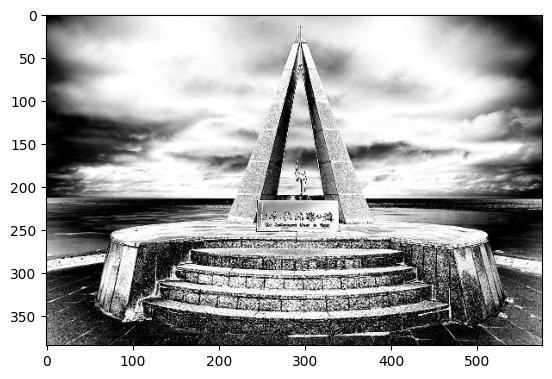

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('soya.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
A = 255/2
before_pixel_value = np.arange(256)
after_pixel_value = A * np.sin(4 * np.pi * (before_pixel_value/255 + 3/8)) + A
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

    - B. カラー画像に対して
        1. Rの画素値をすべて0にする

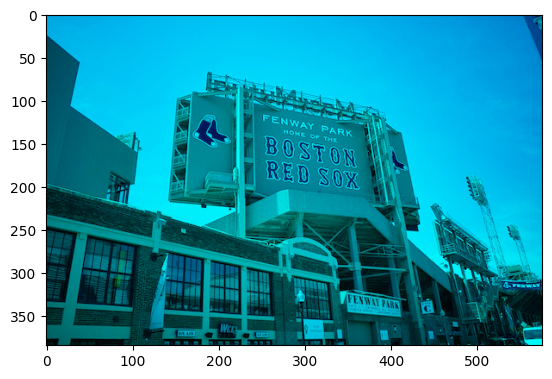

In [34]:
# サンプルプログラム
# 赤の画素値だけ255にする
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

# 一旦，画素値をすべてコピーする
after_image = image.copy()

# ルックアップテーブルを作成する
before_pixel_value = np.arange(256)
# 画素値を+255する
after_pixel_value = before_pixel_value - 255
# 画素値を0から255にする
after_pixel_value = np.clip(after_pixel_value, 0, 255)
# 画素値を小数から整数にする
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image[:, :, 0] = cv2.LUT(image[:, :, 0], after_pixel_value)
after_image[:, :, 1] = cv2.LUT(image[:, :, 1], before_pixel_value)
after_image[:, :, 2] = cv2.LUT(image[:, :, 2], before_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.show()

        2. RとGの画素値をすべて0にする

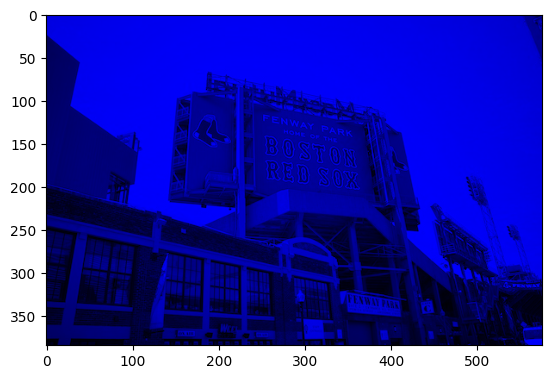

In [35]:
# サンプルプログラム
# 赤の画素値だけ255にする
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

# 一旦，画素値をすべてコピーする
after_image = image.copy()

# ルックアップテーブルを作成する
before_pixel_value = np.arange(256)
# 画素値を+255する
after_pixel_value = before_pixel_value - 255
# 画素値を0から255にする
after_pixel_value = np.clip(after_pixel_value, 0, 255)
# 画素値を小数から整数にする
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image[:, :, 0] = cv2.LUT(image[:, :, 0], after_pixel_value)
after_image[:, :, 1] = cv2.LUT(image[:, :, 1], after_pixel_value)
after_image[:, :, 2] = cv2.LUT(image[:, :, 2], before_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.show()

        3. Bの画素値に対してガンマ変換（γ = 1.5）

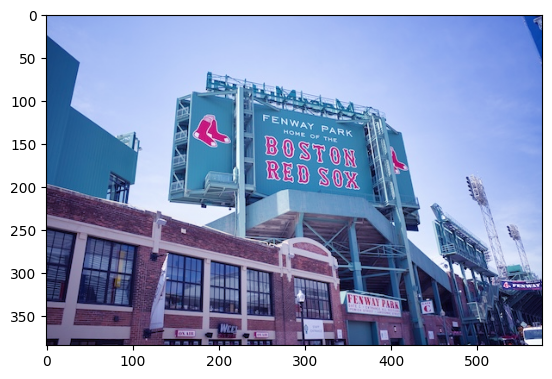

In [45]:
# RGBすべてにガンマ変換
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

# 一旦，画素値をすべてコピーする
after_image = image.copy()

# ルックアップテーブルを作成する
gamma = 1.5
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value / 255) ** (1 / gamma)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 各画素に画像変換を行う
after_image[:, :, 0] = cv2.LUT(image[:, :, 0], before_pixel_value)
after_image[:, :, 1] = cv2.LUT(image[:, :, 1], before_pixel_value)
after_image[:, :, 2] = cv2.LUT(image[:, :, 2], after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.show()